## Stack Overflow Data - 2017 Survey

The CRISP-DM Process (Cross Industry Process for Data Mining)
1. Business/Problem Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(19102, 154)

In [15]:
df.isnull().sum()

Respondent                         0
Professional                       0
ProgramHobby                       0
Country                            0
University                         0
EmploymentStatus                   0
FormalEducation                    0
MajorUndergrad                  3203
HomeRemote                      2631
CompanySize                     4449
CompanyType                     4493
YearsProgram                      97
YearsCodedJob                   3711
YearsCodedJobPast              18753
DeveloperType                   5330
WebDeveloperType               14816
MobileDeveloperType            18546
NonDeveloperType               17414
CareerSatisfaction              3000
JobSatisfaction                 3849
ExCoderReturn                  18767
ExCoderNotForMe                18770
ExCoderBalance                 18767
ExCoder10Years                 18766
ExCoderBelonged                18767
ExCoderSkills                  18766
ExCoderWillNotCode             18770
E

### 1. Business/Problem Understanding
Since women are underrepresented in the IT in Germany, I would like to see if that is true globaly and are there countries that do a better in this area. 

1. What percentage of developers on stackoverflow are women?
2. Which countries have a higher percentage of women?
3. What eduction do women in tech have?

In order to answer my questions, I decided to use the following columns:

* Country
* University
* FormalEducation
* MajorUndergrad
* Gender
* Race
* Salary

### 2. Data Understanding

The data was collected by Stack Overflow as developer survey from 2017. 

### 3. Gather Data
Data has been gathered by Stack Overflow. 

In [9]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc

## Preparing data in order to answer "What percentage are women?"

In [12]:
get_description('Gender')

'Which of the following do you currently identify as?'

In [13]:
#Provide a pandas series of the counts for each CousinEducation status
gender_ed_vals = df.Gender.value_counts()


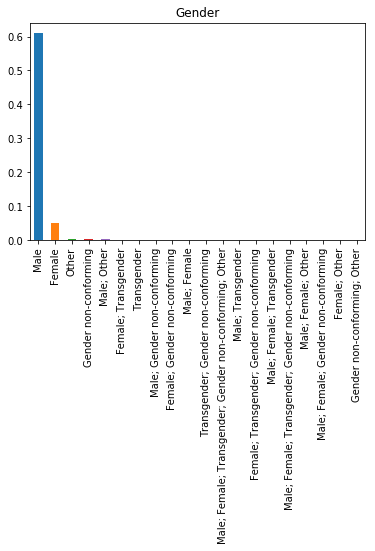

In [14]:
(gender_ed_vals/df.shape[0]).plot(kind="bar");
plt.title("Gender");

In [17]:
# drop rows with NaN values in column Gender
df = df.dropna(axis=0, subset=['Gender'])

In [23]:
gender = df['Gender'].value_counts().reset_index()

In [24]:
gender.head()

,index,Gender
0,Male,11664
1,Female,970
2,Other,73
3,Gender non-conforming,54
4,Male; Other,42


In [27]:
gender['percent']=gender['Gender']/np.sum(gender['Gender'])*100

In [28]:
gender.head()

,index,Gender,percent
0,Male,11664,90.348567
1,Female,970,7.513555
2,Other,73,0.565453
3,Gender non-conforming,54,0.418280
4,Male; Other,42,0.325329


According to the data from Stack Overflow 2017 survay, 7.5% were female

In [34]:
#dataset only containing females
fem_df = df.loc[df['Gender'].isin(['Female'])]

In [36]:
fem_df.shape

(970, 154)

In [37]:
fem_df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
10,11,Professional non-developer who sometimes write...,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,All or almost all the time (I'm full-time remote),100 to 499 employees,...,Strongly disagree,Female,"Some college/university study, no bachelor's d...",White or of European descent,Strongly disagree,Agree,Strongly disagree,Strongly agree,NaN,NaN
13,14,Professional developer,"Yes, both",Germany,No,Employed full-time,Some college/university study without earning ...,Computer science or software engineering,"Less than half the time, but at least one day ...",Fewer than 10 employees,...,Disagree,Female,A master's degree,Hispanic or Latino/Latina,Somewhat agree,Agree,Disagree,Strongly agree,NaN,NaN
103,104,Professional developer,No,United States,No,Employed full-time,Bachelor's degree,Something else,Never,20 to 99 employees,...,Disagree,Female,A bachelor's degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,51000.000000,NaN
165,166,Professional developer,"Yes, I program as a hobby",Germany,No,Employed full-time,Some college/university study without earning ...,Something else,A few days each month,"10,000 or more employees",...,NaN,Female,"Some college/university study, no bachelor's d...",White or of European descent,Agree,Somewhat agree,Somewhat agree,Somewhat agree,NaN,NaN
214,215,Professional developer,"Yes, I contribute to open source projects",Germany,No,Employed full-time,Master's degree,Computer science or software engineering,A few days each month,"5,000 to 9,999 employees",...,Somewhat agree,Female,A doctoral degree,White or of European descent,Strongly agree,Somewhat agree,Strongly disagree,Strongly agree,51612.903226,NaN


### What countries are they from?

There are no missing values in Country column.

In [38]:
country_ed_vals = fem_df.Country.value_counts()

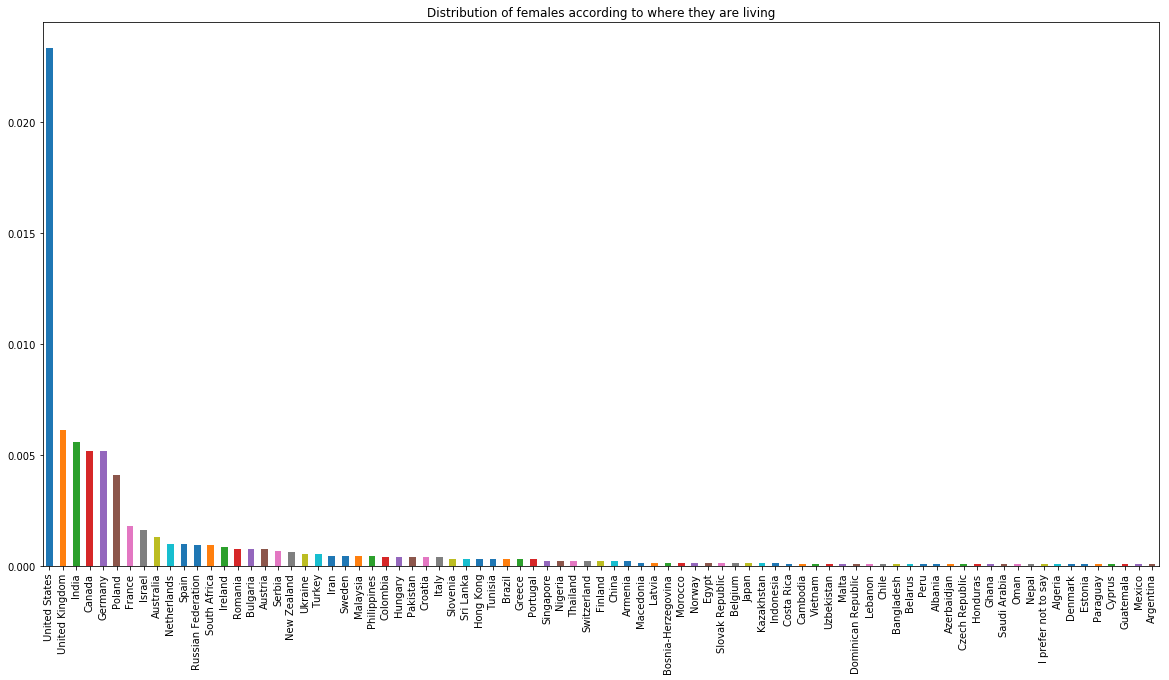

In [48]:
(country_ed_vals/df.shape[0]).plot(kind="bar", figsize=(20,10), width = 0.5);
plt.title("Distribution of females according to where they are living");

It appears that US has the most female developers on Stack Overflow compared to other countries, followed by UK, India, Canada, Germany and Poland. First I thought this might be due to population size (USA: 329mil, UK: 63mil India: 1.3bil, Canada: 37mil, Germany: 83mil and Poland around 40mil). This requires a further study of demographics which is out of the score of this survay.

### Does education play a role?

University and FormalEducation have no missing values

In [49]:
fem_df['University'].value_counts()/fem_df.shape[0] - sum(fem_df['University'].isnull())

No                     0.779381
Yes, full-time         0.150515
Yes, part-time         0.057732
I prefer not to say    0.012371
Name: University, dtype: float64

In [50]:
fem_df['FormalEducation'].value_counts()/fem_df.shape[0] - sum(fem_df['FormalEducation'].isnull())

Bachelor's degree                                                    0.506186
Master's degree                                                      0.258763
Some college/university study without earning a bachelor's degree    0.109278
Secondary school                                                     0.055670
Doctoral degree                                                      0.050515
Professional degree                                                  0.012371
I prefer not to answer                                               0.006186
Primary/elementary school                                            0.001031
Name: FormalEducation, dtype: float64

Based on analysis of education level of females, 78% are not students. Most of the participants of the survay (51%) have a bachelor's, followed by Master's (26%), which is not very striking. 

### What about race? 

In [54]:
race_ed_vals = fem_df.Race.value_counts()

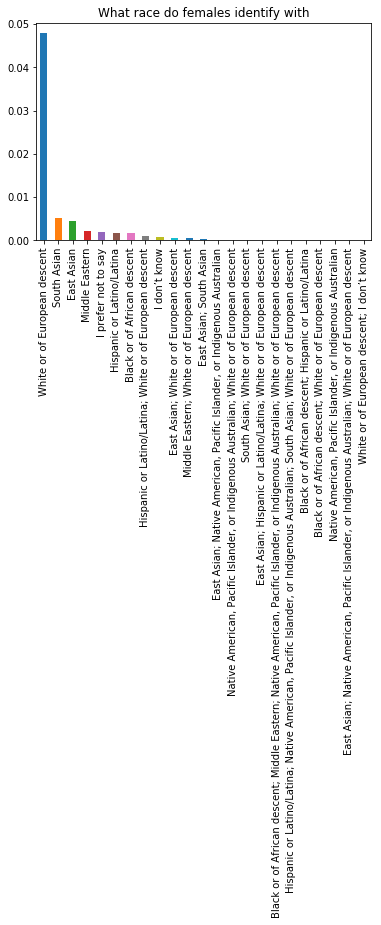

In [55]:
(race_ed_vals/df.shape[0]).plot(kind="bar");
plt.title("What race do females identify with");

This is not very surprising, given that most live in US and Europe. 

## Conclusion
Analysis of the Stack Overflow 2017 survay supports the trend that females are underrepresented in the IT industry. However, more specific data is needed in order to explore this question further.